# 6.4 Supervised Machine Learning-Regression

## Contents list:


#### 01 Importing libraries
#### 02 Importing data
#### 03 Data consistency checks
#### 04 Data prep for regression analysis
#### 05 Linear regression analysis

#### 01 Importing libraries

In [1]:
# Step 2 - Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### 02 Importing data

In [2]:
# Project folder path as string
path = r'C:\Users\User\Desktop\Chocolate Bar Ratings'

In [3]:
# Import exploring_relationships.csv data set using the os library
df_c= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'exploring_relationships.csv'), index_col = False)

In [4]:
# Checking the number of rows and columns
df_c.shape

(1721, 10)

In [5]:
df_c.head()

,Unnamed: 0,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin,cocoa_percent_category
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome,Low_cocoa_percentage
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo,Middle_cocoa_percentage
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo,Middle_cocoa_percentage
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo,Middle_cocoa_percentage
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru,Middle_cocoa_percentage


In [6]:
# Dropping the Unnamed: 0 column from df_c dataframe
df_c=df_c.drop(columns = ['Unnamed: 0'])

In [7]:
# Checking the number of rows and columns
df_c.shape

(1721, 9)

In [8]:
df_c.head()

,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin,cocoa_percent_category
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome,Low_cocoa_percentage
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo,Middle_cocoa_percentage
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo,Middle_cocoa_percentage
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo,Middle_cocoa_percentage
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru,Middle_cocoa_percentage


#### 03 Data consistency checks

In [9]:
# Checking for mixed-type data
for col in df_c.columns.tolist():
  weird = (df_c[[col]].applymap(type) != df_c[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_c[weird]) > 0:
    print (col)

- No mixed-type data found.

In [10]:
# Missing values - finding missing values
df_c.isnull().sum()

company                             0
specific_bean_origin_or_bar_name    0
reference_number                    0
review_date                         0
cocoa_percent                       0
company_location                    0
rating                              0
broad_bean_origin                   0
cocoa_percent_category              0
dtype: int64

In [11]:
# Duplicates - finding duplicates
df_c_ = df_c[df_c.duplicated()]

In [12]:
df_c_

,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin,cocoa_percent_category


In [13]:
df_c_.shape

(0, 9)

- No duplicates found.

In [14]:
# Check the mean
df_c['cocoa_percent'].mean() 

0.717167344567123

In [15]:
# Check the median
df_c['cocoa_percent'].median() 

0.7

In [16]:
# Check the max
df_c['cocoa_percent'].max() 

1.0

In [17]:
%matplotlib inline

#### 04 Data prep for regression analysis

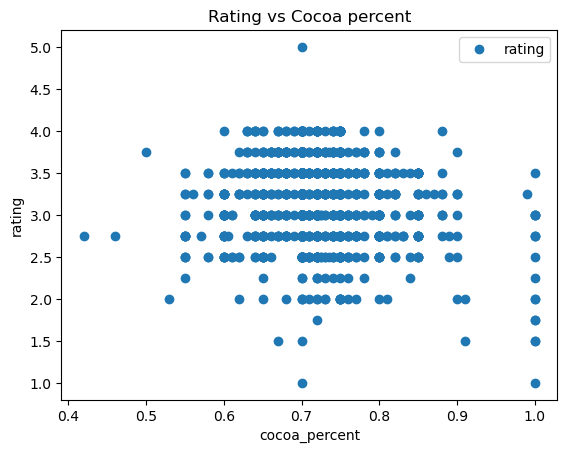

In [18]:
# Step 4 - Explore data visually - Create a scatterplot for variables 'rating' and 'cocoa_percent' 
df_c.plot(x = 'cocoa_percent', y='rating', style='o') 
plt.title('Rating vs Cocoa percent')  
plt.xlabel('cocoa_percent')  
plt.ylabel('rating')  
plt.show()

- Step 5 - Hypothesis:
- *Chocolate bars with 65 – 77 percent of cocoa will have higher rating than chocolate bars with higher or lower cocoa percent.*


In [19]:
# Step 6 - Reshape the variables into NumPy arrays and puting them into separate objects

X = df_c['cocoa_percent'].values.reshape(-1,1)
y = df_c['rating'].values.reshape(-1,1)

In [20]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [21]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [22]:
# Step 7 - Splitting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 05 Linear regression analysis

In [23]:
# Create a regression object

regression = LinearRegression()  

In [24]:
# Step 8.1 - Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Step 8.2 - Predict the values of y using X

y_predicted = regression.predict(X_test)

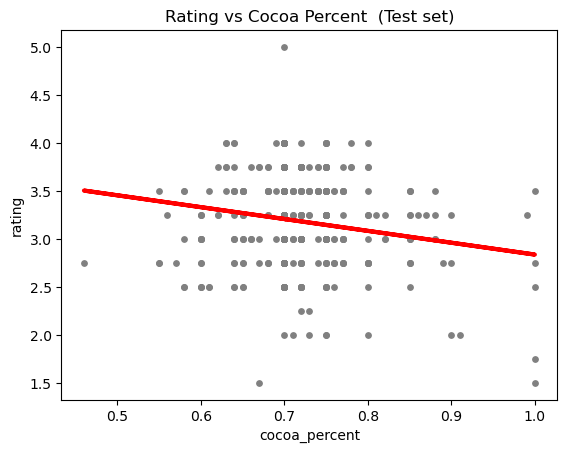

In [26]:
# Step 9 - Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating vs Cocoa Percent  (Test set)')
plot_test.xlabel('cocoa_percent')
plot_test.ylabel('rating')
plot_test.show()

- Step 10 - It can be noticed that the data points are not very close to the regression line. 

In [27]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [28]:
# Step 11 - Check the model perfomance statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.23491977]]
Mean squared error:  0.21013904684868834
R2 score:  0.004749094558398226


In [29]:
# Step 12 - Predicted y values
y_predicted

array([[3.20739355],
       [3.18269516],
       [3.20739355],
       [3.20739355],
       [3.14564757],
       [3.28148874],
       [3.14564757],
       [3.14564757],
       [3.18269516],
       [3.18269516],
       [3.20739355],
       [3.28148874],
       [3.20739355],
       [3.20739355],
       [3.19504436],
       [3.26913954],
       [3.18269516],
       [3.20739355],
       [3.18269516],
       [3.20739355],
       [3.19504436],
       [3.20739355],
       [3.18269516],
       [3.23209195],
       [3.20739355],
       [3.18269516],
       [2.83691762],
       [3.20739355],
       [3.20739355],
       [3.20739355],
       [3.20739355],
       [3.13329837],
       [3.20739355],
       [3.20739355],
       [2.9480604 ],
       [3.18269516],
       [3.18269516],
       [3.08390158],
       [3.14564757],
       [3.20739355],
       [3.20739355],
       [3.20739355],
       [3.39263152],
       [3.20739355],
       [3.20739355],
       [3.12094917],
       [3.20739355],
       [3.120

In [30]:
# Step 12 - Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.00,3.207394
1,3.25,3.182695
2,3.50,3.207394
3,3.25,3.207394
4,3.00,3.145648
5,2.50,3.281489
6,2.50,3.145648
7,2.75,3.145648
8,2.75,3.182695
9,3.00,3.182695


- Checking the model summary statistics, it can be observed existing of negative relationship between variables looking at the slope. Observing R2 score value, which is closer to 0 than 1, what means that it is not so good fit. Looking at summary statistics we can say that linear regression model isn't a good fit, maybe another model would be better fit, that is what should be researched further.

In [31]:
# Comparing how the regression fits the training set
# Predict
y_predicted_train = regression.predict(X_train) 

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
# Checking perfomance statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.23491977]]
Mean squared error:  0.20693647753401048
R2 score:  0.02572833341667846


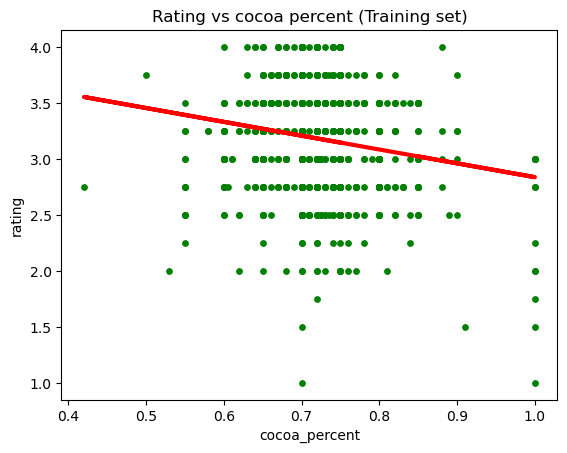

In [34]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rating vs cocoa percent (Training set)')
plot_test.xlabel('cocoa_percent')
plot_test.ylabel('rating')
plot_test.show()

- Comparing summary statistics results for test and training set it can be seen that results are little better for training set but still, it is not so good fit.